## 6.3. 데이터 분석

<font color = blue> sales_data </font>
- 6.3.1 월별 고객 수
   -  한 기준(월)에 대하여 고객 수를 셌다.
   - `coutplot`에 `x`만 넣었다.
- 6.3.2. 월별, 게임별 고객 수
   - 두 기준(월, 게임)에 대하여(`hue`) 고객 수를 셌다.
   - `barplot`에 `x`, `y`를 모두 넣었다.
   - `groupby`를 사용했다.
- 6.3.3. 월별, 플레이/인스톨 고객 수
   - 두 기준(월, 플레이/인스톨)에 대하여(`hue`) 고객 수를 셌다.
   - `countplot`에 `x`만 넣었다.
   
<font color = blue> temp_data </font>
- 6.3.4. 월별 결제 건수
   - 한 기준(월)에 대하여 고객 수를 셌다.
   - `countplot`에 `x`만 넣었다.
- 6.3.5. 월별, 게임별 결제 건수
   - 두 기준(월, 게임)에 대하여(`hue`) 결제 건수를 셌다.
   - `barplot`에 `x`, `y`를 모두 넣었다.
   - `groupby`를 사용했다.
- 6.3.6. 월별, 게임별 결제 금액
   - 두 기준(월, 게임)에 대하여(`hue`) 결제 금액을 계산했다.
   - `barplot`에 `x`, `y`를 모두 넣었다.
   - `groupby`를 사용했다.

<font color = blue> player_data </font>
- 6.3.7. 월별 신규/기존 고객 수
   - 두 기준 (월, 신규/기존)에 대하여(`hue`) 고객 수를 셌다.
   - `countplot`에 `x`만 넣었다.
   - `groupby`를 사용했다.
- 6.3.8. 월별 신규/기존 결제 금액
   - 두 기준(월, 신규/기존)에 대하여(`hue`) 결제 금액을 계산했다.
   - `barplot`에 `x`, `y`를 모두 넣었다.
   - `groupby`를 사용했다.

In [1]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [2]:
# sales_data 변수를 만들고 각 데이터 값을 할당
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_6.csv')

# 변수 sales_data의 head 값 확인하기
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325


In [3]:
# sales_data의 date열을 만들고 Time_stamp 값의 7번째 값까지 입력 
sales_data['date'] = sales_data['Time_stamp'].str[:7]
sales_data.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02


### 6.3.1. 월별 고객 수 - `coutplot`

 - 6.3.1 월별 고객 수
   -  한 기준(월)에 대하여 고객 수를 셌다.
   - `coutplot`에 `x`만 넣었다.

In [4]:
sales_data['date'].value_counts()

2022-03    50465
2022-02    49380
Name: date, dtype: int64

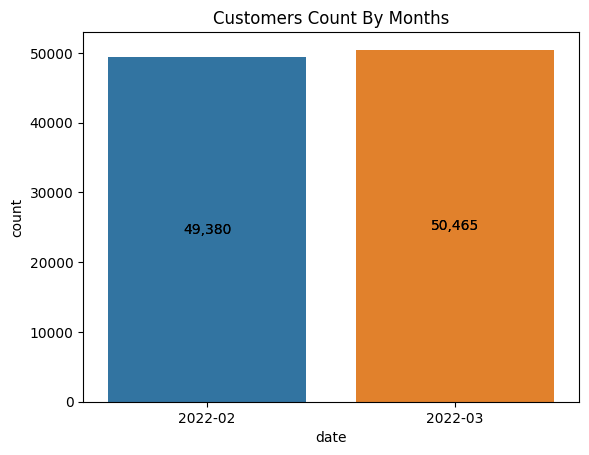

In [33]:
# 월별 고객 수
ax = sns.countplot(data=sales_data, x='date')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customers Count By Months')
plt.show()

보통 plot을 그리는 명령에서 `x`, `y`는 모두 벡터여야 한다.
그런데 여기에서는 `DataFrame`을 그대로 넣고 있고, 단지 `x`만을 설정하고 있다.
하지만, 함수 이름인 `countplot`을 보면, 이것이 타당하다는 것을 알 수 있다.
`x`를 기준으로 해서 자료의 수(행의 수)를 세는 것이니 이것으로 충분한 것이다.

container라는 게 나오는 이유는 아무래도 [이런 곳](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html)에서만 이유를 찾을 수 있을 것 같다.
그러니까 label을 달 때 필요한 명령인 것 같다.
조금 더 정확하게는, 막대그래프 몸통의 무게중심(?)에 출력되는 count값이 중앙에 표시된다.

### 6.3.2. 월별, 게임별 고객 수 - `barplot`

 - 6.3.2. 월별, 게임별 고객 수
   - 두 기준(월, 게임)에 대하여(`hue`) 고객 수를 셌다.
   - `barplot`에 `x`, `y`를 모두 넣었다.
   - `groupby`를 사용했다.

In [31]:
grouped = sales_data['Status'].groupby([sales_data['date'], sales_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       27721
         SoccerManager    21659
2022-03  MineGround       32192
         SoccerManager    18273
Name: Status, dtype: int64

 - 여기에서 `Status`는 별 의미가 없다.
대신 `Customer_ID`을 넣어도, 어차피 count()할 것이니 상관없다.
 - 일차적으로 `data`를 이차적으로 `GameName`을 기준으로 두고 있다.

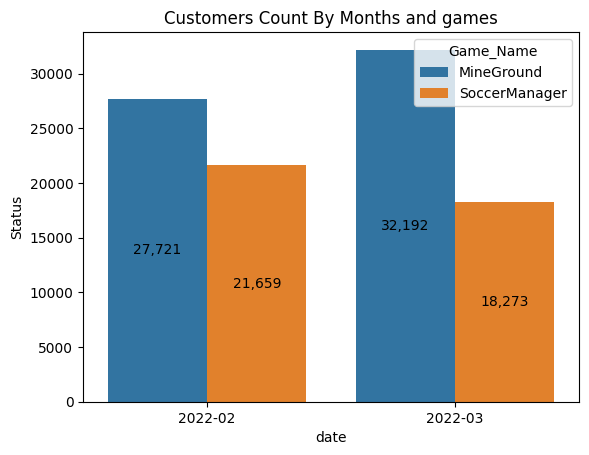

In [34]:
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Status', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customers Count By Months and games')
plt.show()

 - 두 기준 `data`, `GameName`을 기준으로 하여, 숫자를 센다, 즉, 여기에서도 굳이 `Status`일 필요는 없다.
 - 사용하는 것은 `barplot`이다

### 6.3.3. 월별, 플레이/인스톨 고객 수 - `countplot`

 - 6.3.3. 월별, 플레이/인스톨 고객 수
   - 두 기준(월, 플레이/인스톨)에 대하여(`hue`) 고객 수를 셌다.
   - `countplot`에 `x`만 넣었다.

In [8]:
# sales_data의 Status 열에 포함된 값들의 개수 세어보기
sales_data['Status'].value_counts()

play       84821
install    15024
Name: Status, dtype: int64

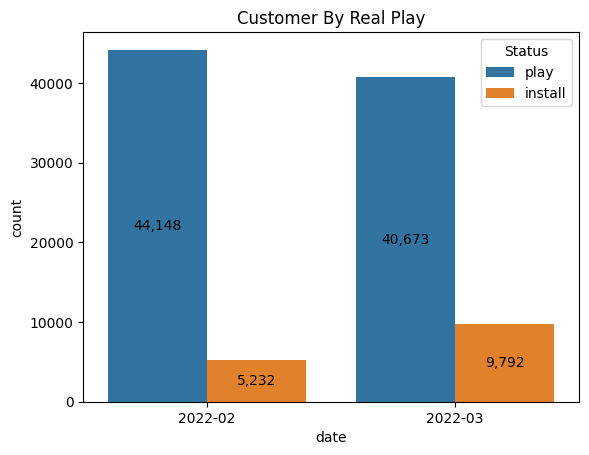

In [9]:
# 월별 플레이/인스톨 고객 현황 시각화하기
ax = sns.countplot(data=sales_data, x='date', hue='Status')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
containers0 = ax.containers[-1]
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer By Real Play')

plt.show()

### 6.3.4. 월별 결제 건수 - `countplot`

 - 6.3.4. 월별 결제 건수
   - 한 기준(월)에 대하여 고객 수를 셌다.
   - `countplot`에 `x`만 넣었다.

In [35]:
temp_data = sales_data[sales_data['Payment'] !=0]
temp_data['date'].value_counts()

2022-02    8542
2022-03    6898
Name: date, dtype: int64

In [36]:
print(sales_data.shape)
print(temp_data.shape)

(99845, 7)
(15440, 7)


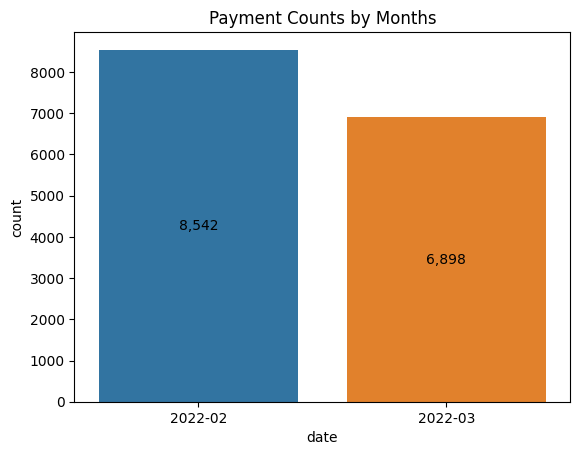

In [37]:
# 월별 결제 건수 시각화하기
ax = sns.countplot(data=temp_data, x='date')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Counts by Months')
plt.show()

### 6.3.5. 월별, 게임별 결제 건수 - `barplot`

 - 6.3.5. 월별, 게임별 결제 건수
   - 두 기준(월, 게임)에 대하여(`hue`) 결제 건수를 셌다.
   - `barplot`에 `x`, `y`를 모두 넣었다.
   - `groupby`를 사용했다.

In [39]:
# 각 게임별 결제 건수 확인하기
grouped = temp_data['Payment'].groupby([temp_data['date'], temp_data['Game_Name']]).count()
grouped

date     Game_Name    
2022-02  MineGround       4318
         SoccerManager    4224
2022-03  MineGround       3762
         SoccerManager    3136
Name: Payment, dtype: int64

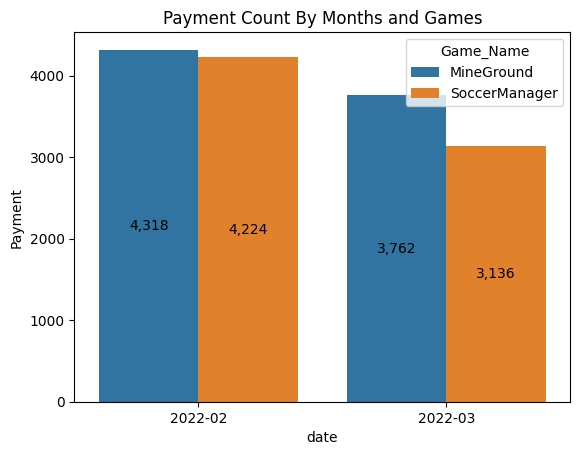

In [40]:
# 각 게임별 결제 건수 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Count By Months and Games')
plt.show()

여기서는 'Payment'를 다른 걸로 바꾸면 안된다.
결제건수를 세고 있기 때문이다.

### 6.3.6. 월별, 게임별 결제금액

 - 6.3.6. 월별, 게임별 결제 금액
   - 두 기준(월, 게임)에 대하여(`hue`) 결제 금액을 계산했다.
   - `barplot`에 `x`, `y`를 모두 넣었다.
   - `groupby`를 사용했다.

In [42]:
# 각 게임별 결제 금액 확인하기
grouped = temp_data['Payment'].groupby([temp_data['date'],temp_data['Game_Name']]).sum()
grouped

date     Game_Name    
2022-02  MineGround       42114200
         SoccerManager    38727600
2022-03  MineGround       38722800
         SoccerManager    29638400
Name: Payment, dtype: int64

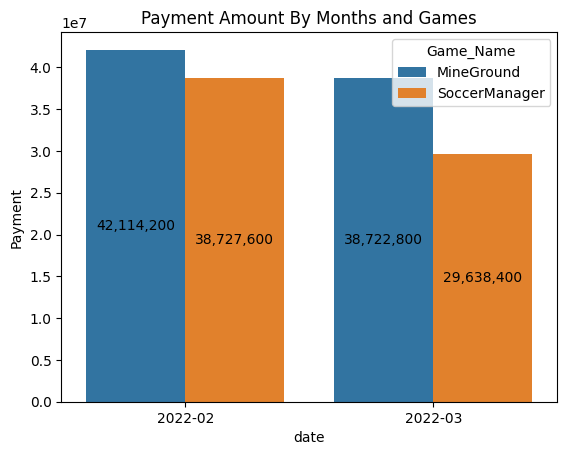

In [43]:
# 각 게임별 결제 금액 시각화하기
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment', hue='Game_Name')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Amount By Months and Games')
plt.show()

### 6.3.7. 월별 신규/기존 고객 수 - `countplot`

 - 6.3.7. 월별 신규/기존 고객 수
   - 두 기준 (월, 신규/기존)에 대하여(`hue`) 고객 수를 셌다.
   - `countplot`에 `x`만 넣었다.
   - `groupby`를 사용했다.

In [17]:
# player_data변수를 만들고 sales_data에서 Status가 play인 고객들만 골라내 할당하기
player_data = sales_data[sales_data['Status'] == 'play']
player_data

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,date
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,2022-02
...,...,...,...,...,...,...,...
84816,2022-03-06,2022-03-11,SoccerManager,play,0,sed821,2022-03
84817,2022-03-20,2022-03-23,SoccerManager,play,0,minima581,2022-03
84818,2022-03-25,2022-03-27,SoccerManager,play,0,harum162,2022-03
84819,2022-03-15,2022-03-18,SoccerManager,play,0,eveniet498,2022-03


In [18]:
# plater_data에 install_date열을 만들고, install열 값의 7번째 값까지 입력
player_data = player_data.copy()
player_data['install_date'] = player_data['install'].str[:7]
player_data['play_date'] = player_data['Time_stamp'].str[:7]

In [19]:
# plater_data에 type열을 만들고, install_date와 play_date열의
# 값이 같으면 New Player을 입력, 값이 다르면 Existing을 입력
player_data['type'] = np.where(
    player_data['install_date']==player_data['play_date'], 'New Player', 'Existing')

In [20]:
# 월별 신규 고객과 기존 고객 현황 세어보기
grouped = player_data['Status'].groupby([player_data['play_date'], player_data['type']]).count()
grouped

play_date  type      
2022-02    Existing      28668
           New Player    15480
2022-03    Existing      28207
           New Player    12466
Name: Status, dtype: int64

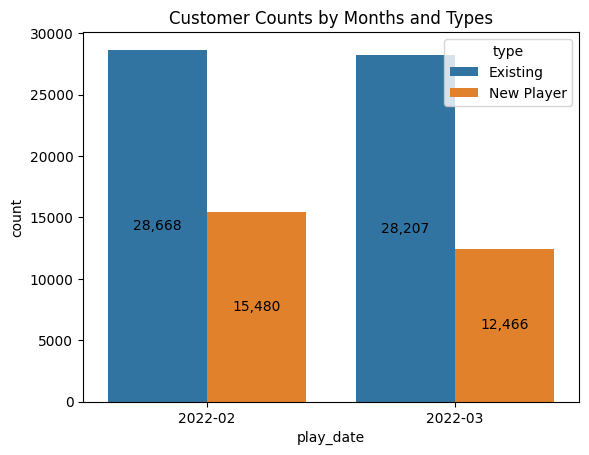

In [44]:
# 월별 신규 고객과 기존 고객 현황 시각화하기
ax = sns.countplot(data=player_data, x='play_date', hue="type")

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Customer Counts by Months and Types')
plt.show()

### 6.3.8. 월별 신규/기존 결제 금액 - `barplot`

 - 6.3.8. 월별 신규/기존 결제 금액
   - 두 기준(월, 신규/기존)에 대하여(`hue`) 결제 금액을 계산했다.
   - `barplot`에 `x`, `y`를 모두 넣었다.
   - `groupby`를 사용했다.

In [46]:
grouped = player_data['Payment'].groupby([player_data['play_date'],player_data['type']]).sum()
grouped

play_date  type      
2022-02    Existing      50140500
           New Player    30701300
2022-03    Existing      50140500
           New Player    18220700
Name: Payment, dtype: int64

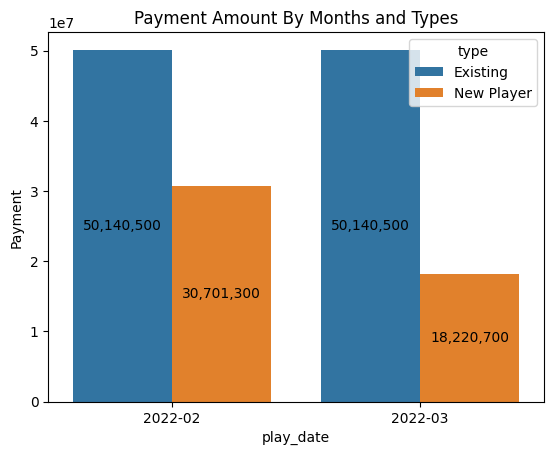

In [47]:
ax = sns.barplot(data=grouped.reset_index(), x='play_date', y='Payment', hue='type')

containers = ax.containers[-1]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Payment Amount By Months and Types')
plt.show()